In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('resources/train.csv')

# Exploratory Data Analysis

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
df.isnull().sum().nlargest(81)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [5]:
print(df.isna().sum().nlargest(len(df)))
# Filling missing numerical values
df_num = df.select_dtypes(include=['float64', 'int64'])
for colonne in df_num.columns:
    df[colonne] = df[colonne].fillna(df[colonne].median())

# Filling missing String object values
df_obj = df.select_dtypes(include=['object'])
for colonne in df_obj.columns:
    df[colonne] = df[colonne].fillna('NONE')
for colonne in df_obj.columns:
    df[colonne]=pd.factorize(df[colonne])[0]

print(df.isna().sum().nlargest(len(df)))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64
Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64


There are 81 columns in the dataset and the dataset contains 1460 rows. The label is SalePrice.

There's no doublon in the dataset but a lot of NA values.

The columns with many missing values are: PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu.
Some NA values mean "Not present" such as NA PoolQC means "No Pool". So it should be considered as an information instead of a lack of information.

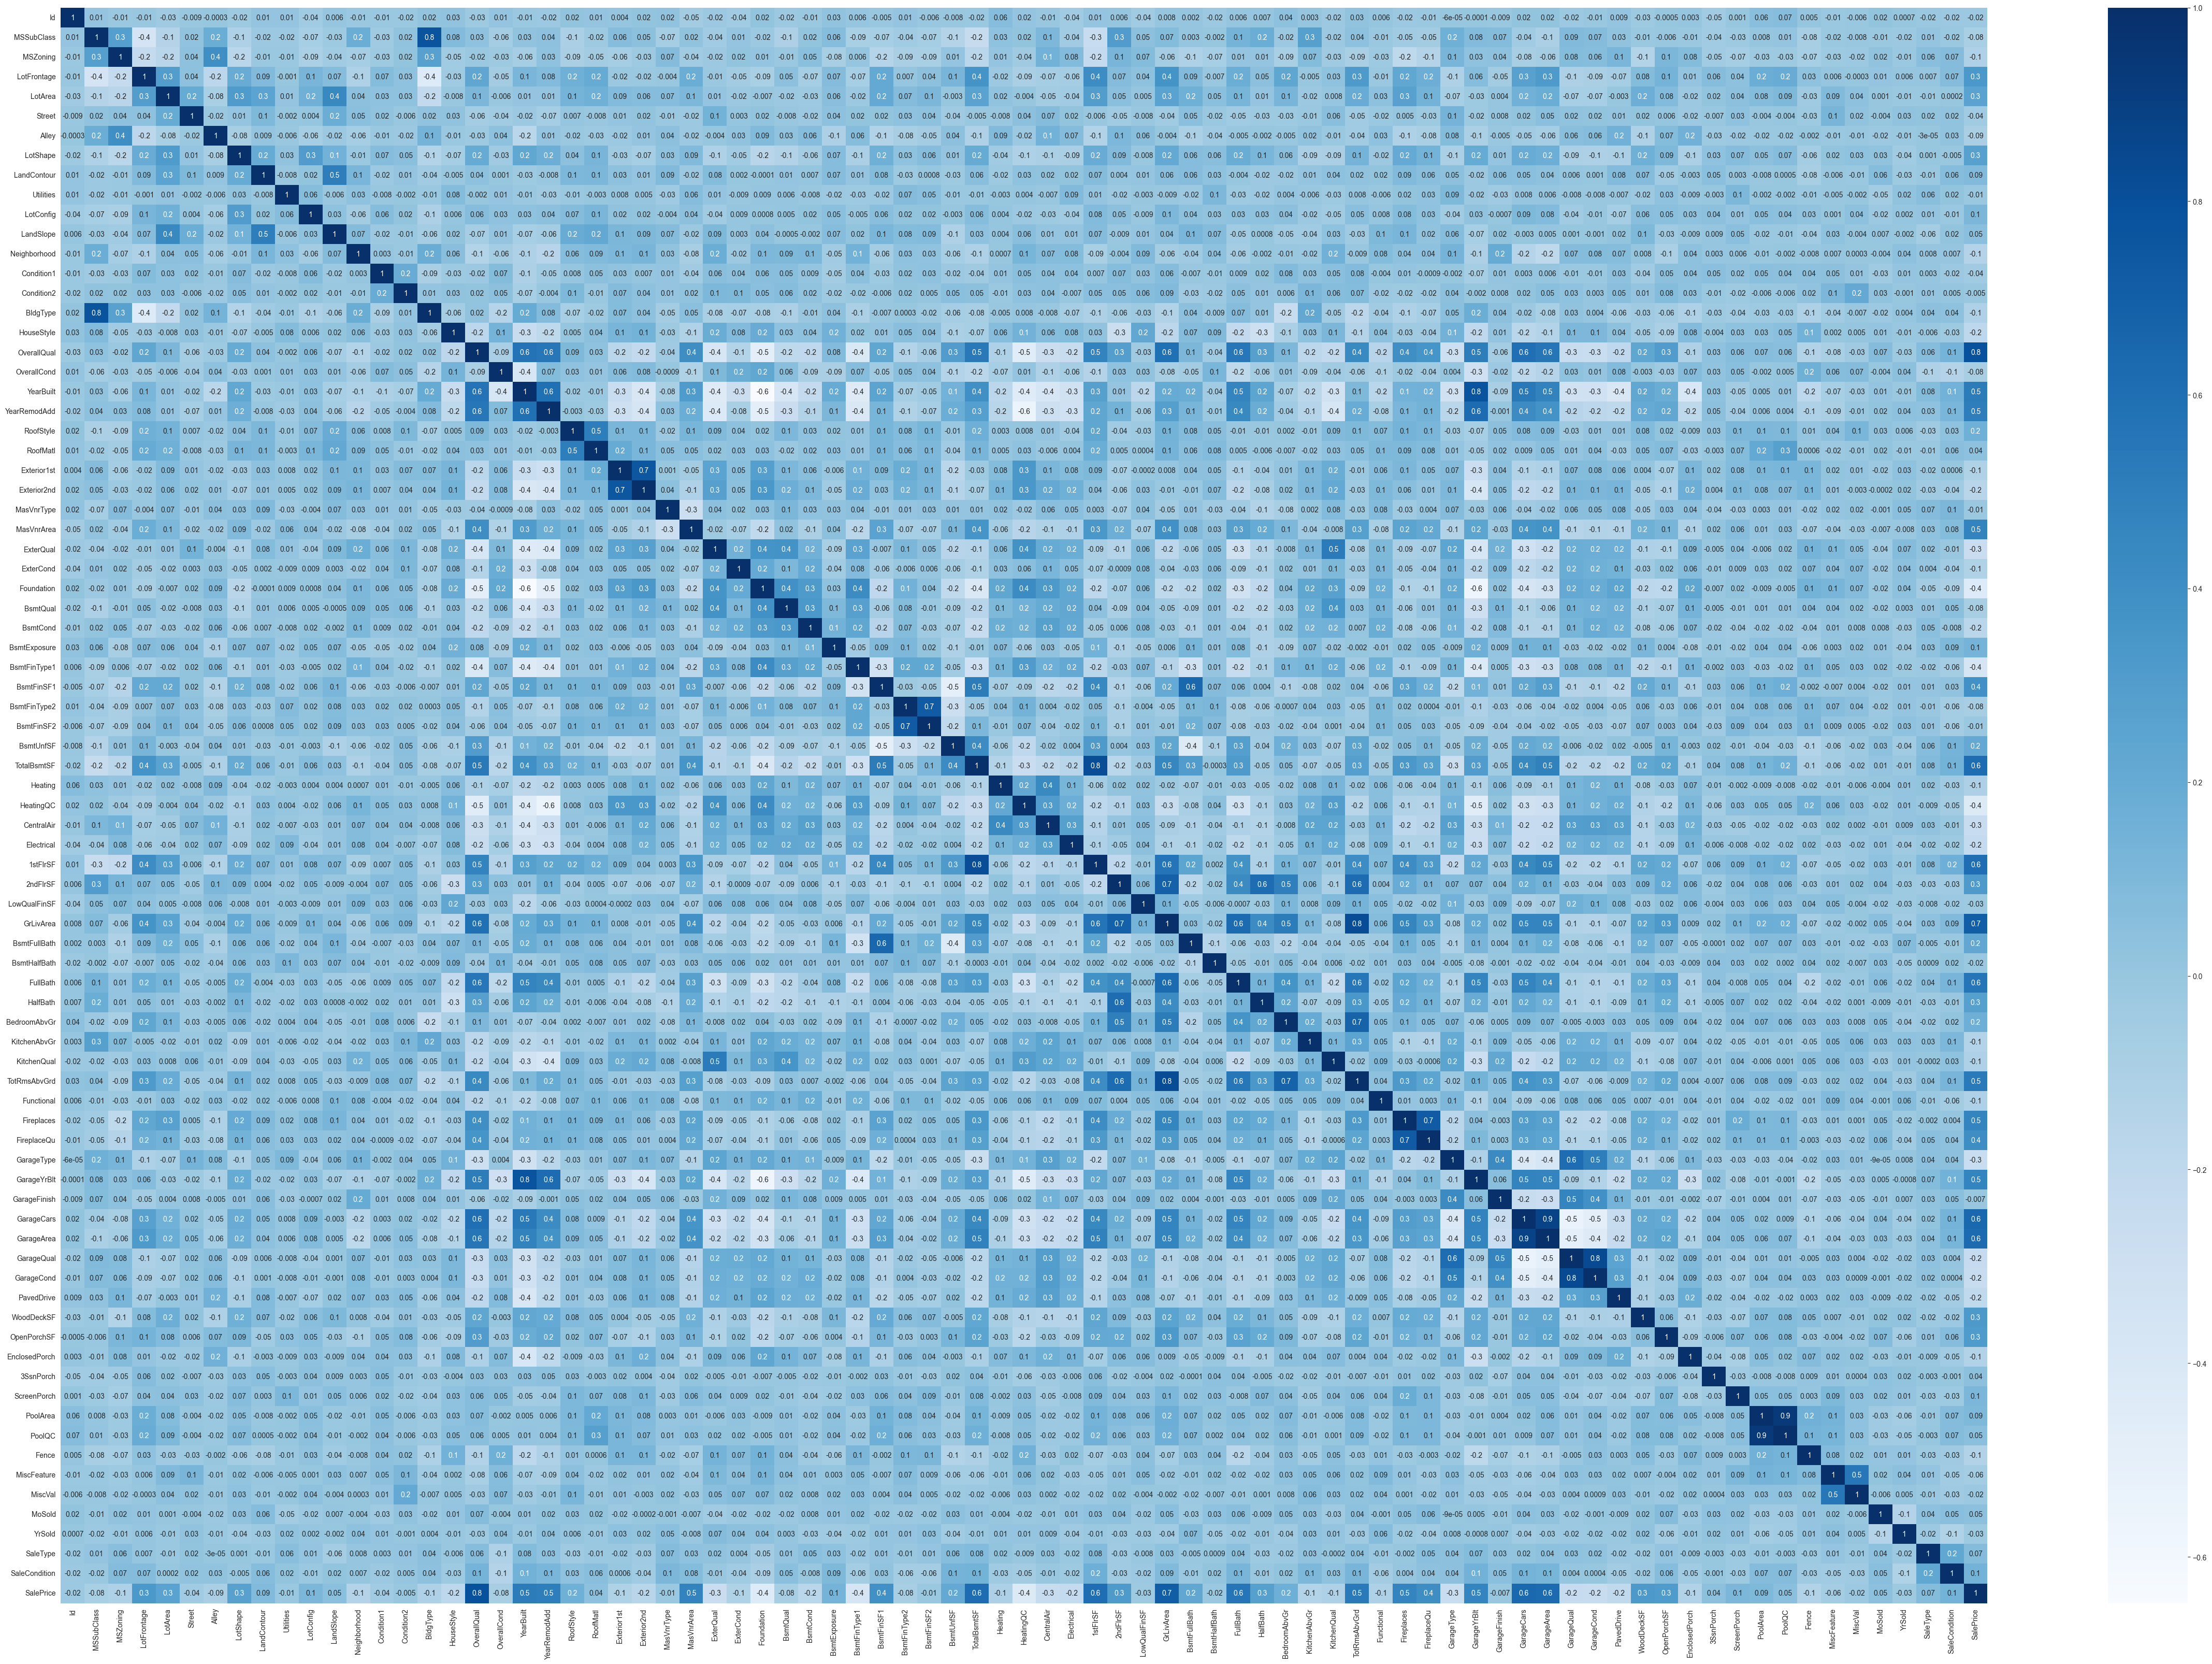

In [6]:
#TODO Graphique de corrélation
cor=df.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

In [7]:
# Calculer la corrélation entre 'SalePrice' et les autres colonnes
correlation_with_sale_price = cor['SalePrice']

# Sélectionner les colonnes en X avec un coefficient de corrélation supérieur à 0.1 avec 'SalePrice'
relevant_columns = correlation_with_sale_price[(correlation_with_sale_price > 0.5) | (correlation_with_sale_price < -0.5)].index.tolist()

# Afficher les colonnes en X avec un coefficient de corrélation supérieur à 0.1 avec 'SalePrice'
print("Colonnes en X avec un coefficient de corrélation strictement supérieur à 0.1 avec 'SalePrice' :")
print(relevant_columns)

Colonnes en X avec un coefficient de corrélation strictement supérieur à 0.1 avec 'SalePrice' :
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


# Data Preprocessing and encoding

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Selecting features
selected_features_winner = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath', 'TotRmsAbvGrd',
                            'YearRemodAdd',
                            'GarageArea', 'LotArea', 'OverallCond', 'OverallQual', 'Neighborhood', 'KitchenQual',
                            'ExterQual',
                            'GarageCars', 'Foundation', 'BsmtQual', 'RoofStyle', 'BsmtExposure', 'SalePrice']

selected_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
                     'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice',
                     'LotFrontage', 'LotArea', 'LotShape', 'BsmtFinSF1', 'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath',
                     'HalfBath', 'BedroomAbvGr', 'FireplaceQu', 'WoodDeckSF', 'OpenPorchSF', 'Neighborhood',
                     'Foundation', 'BsmtQual', 'KitchenQual', 'BsmtExposure', 'ExterQual']

selected_features_old = ['LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']

# Subsetting dataframe
df = df[selected_features]

# Filling missing numerical values
df_num = df.select_dtypes(include=['float64', 'int64'])
for colonne in df_num.columns:
    df[colonne] = df[colonne].fillna(df[colonne].median())

# Filling missing String object values
df_obj = df.select_dtypes(include=['object'])
for colonne in df_obj.columns:
    df[colonne] = df[colonne].fillna('NONE')

print(df.isna().sum().nlargest(len(selected_features)))


OverallQual     0
YearBuilt       0
BsmtExposure    0
KitchenQual     0
BsmtQual        0
Foundation      0
Neighborhood    0
OpenPorchSF     0
WoodDeckSF      0
FireplaceQu     0
BedroomAbvGr    0
HalfBath        0
BsmtFullBath    0
2ndFlrSF        0
BsmtUnfSF       0
BsmtFinSF1      0
LotShape        0
LotArea         0
LotFrontage     0
SalePrice       0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
FullBath        0
GrLivArea       0
1stFlrSF        0
TotalBsmtSF     0
MasVnrArea      0
YearRemodAdd    0
ExterQual       0
dtype: int64


In [9]:
# Separating target variable
X = df.drop(columns='SalePrice')
y = df['SalePrice']

# One-hot encoding categorical features
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X.select_dtypes(include=['object', 'int64', 'float64']))

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(exclude=['object']))

# Concatenating encoded categorical features and scaled numerical features
X_preprocessed = pd.concat([pd.DataFrame(X_encoded.toarray()), pd.DataFrame(X_scaled)], axis=1)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Training the model

In [10]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the model -> Lasso is the most effective
#model_lasso = Lasso(max_iter=30000)
model_rfg = RandomForestRegressor(random_state=42)
model_gbm = GradientBoostingRegressor(random_state=42)

# Train the model
#model_lasso.fit(X_train, y_train)
model_rfg.fit(X_train, y_train)
model_gbm.fit(X_train, y_train)

print('END TRAINING')

END TRAINING


In [11]:
# Retrieve the model's predictions
#y_pred_lasso = model_lasso.predict(X_test)
y_pred_rfg = model_rfg.predict(X_test)
y_pred_gbm = model_gbm.predict(X_test)

In [12]:
y_preds = np.column_stack((y_test,y_pred_gbm, y_pred_rfg))
y_preds

array([[154500.        , 137994.53265912, 138732.        ],
       [325000.        , 334754.86338676, 333730.85      ],
       [115000.        , 121584.63256516, 113308.08      ],
       [159000.        , 150614.722331  , 151516.5       ],
       [315500.        , 326756.26296874, 314326.04      ],
       [ 75500.        ,  76606.27726955,  81197.        ],
       [311500.        , 226734.17331711, 203740.24      ],
       [146000.        , 151100.29144463, 150017.82      ],
       [ 84500.        ,  76606.27726955,  79353.        ],
       [135500.        , 120236.18923818, 122756.11      ],
       [145000.        , 150562.89461858, 151354.84      ],
       [130000.        , 124032.82808451, 123811.17      ],
       [ 81000.        , 109214.35295499, 102698.1       ],
       [214000.        , 198471.33373584, 208429.4       ],
       [181000.        , 170862.92480376, 179386.        ],
       [134500.        , 131521.82809029, 128857.5       ],
       [183500.        , 196218.03853231

In [13]:
y_pred = (y_pred_gbm + y_pred_rfg) / 2

In [14]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [15]:
y_tab = np.column_stack((y_test, y_pred))
y_tab

array([[154500.        , 138363.26632956],
       [325000.        , 334242.85669338],
       [115000.        , 117446.35628258],
       [159000.        , 151065.6111655 ],
       [315500.        , 320541.15148437],
       [ 75500.        ,  78901.63863477],
       [311500.        , 215237.20665855],
       [146000.        , 150559.05572232],
       [ 84500.        ,  77979.63863477],
       [135500.        , 121496.14961909],
       [145000.        , 150958.86730929],
       [130000.        , 123921.99904226],
       [ 81000.        , 105956.22647749],
       [214000.        , 203450.36686792],
       [181000.        , 175124.46240188],
       [134500.        , 130189.66404514],
       [183500.        , 194463.26926615],
       [135000.        , 135195.81264462],
       [118400.        , 114453.81069811],
       [226000.        , 207612.15624083],
       [155000.        , 162875.19359975],
       [210000.        , 226960.8319825 ],
       [173500.        , 174923.71041227],
       [129

In [16]:
diff = np.abs(y_tab[:, 0] - y_tab[:, 1])

# Filtrer les lignes où la différence est supérieure à 30 000
indices = np.where(diff > 30000)

# Extraire les lignes correspondantes
result = y_tab[indices]
result

array([[311500.        , 215237.20665855],
       [141000.        , 108918.32326869],
       [284000.        , 247772.65390152],
       [205000.        , 237786.78204827],
       [253293.        , 364840.40756589],
       [451950.        , 421413.79375077],
       [287000.        , 348126.63085948],
       [107000.        , 147599.75154718],
       [243000.        , 208429.79674232],
       [611657.        , 427568.25556768],
       [348000.        , 312572.07595124],
       [341000.        , 295229.66524581],
       [ 67000.        , 104402.47237317],
       [301000.        , 255196.42687599],
       [244000.        , 276879.36856739],
       [135000.        , 176321.23292279],
       [112000.        , 160717.60158109],
       [ 35311.        ,  83440.41740103],
       [755000.        , 557755.04101102],
       [403000.        , 351930.68219719],
       [250000.        , 217810.43271936],
       [200624.        , 253922.44463897],
       [108959.        , 153829.27032574],
       [179

# Metrics - Evaluating the model

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, root_mean_squared_log_error

mae = mean_absolute_error(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred)

mape_percentage = np.abs((y_test - y_pred) / y_test).mean() * 100

rmsle = root_mean_squared_log_error(y_test, abs(y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percentage = (rmse / y_test.mean()) * 100

r2 = r2_score(y_test, y_pred)

print("Erreur absolue moyenne (MAE):", mae)
print("Erreur absolue moyenne en pourcentage (MAPE):", mape)
print("MAPE en pourcentage:", mape_percentage)

print("Erreur quadratique moyenne (RMSE):", rmse)
print("RMSE en pourcentage:", rmse_percentage)

print("Erreur quadratique moyenne logarithmique (RMSLE):", rmsle)

print("Coefficient de détermination (R2):", r2)
print("Pourcentage de précision:", r2 * 100)

Erreur absolue moyenne (MAE): 17539.908059992507
Erreur absolue moyenne en pourcentage (MAPE): 0.10706609073845266
MAPE en pourcentage: 10.706609073845266
Erreur quadratique moyenne (RMSE): 29265.52277424794
RMSE en pourcentage: 16.364098410331046
Erreur quadratique moyenne logarithmique (RMSLE): 0.15357795969830243
Coefficient de détermination (R2): 0.888339713316559
Pourcentage de précision: 88.8339713316559


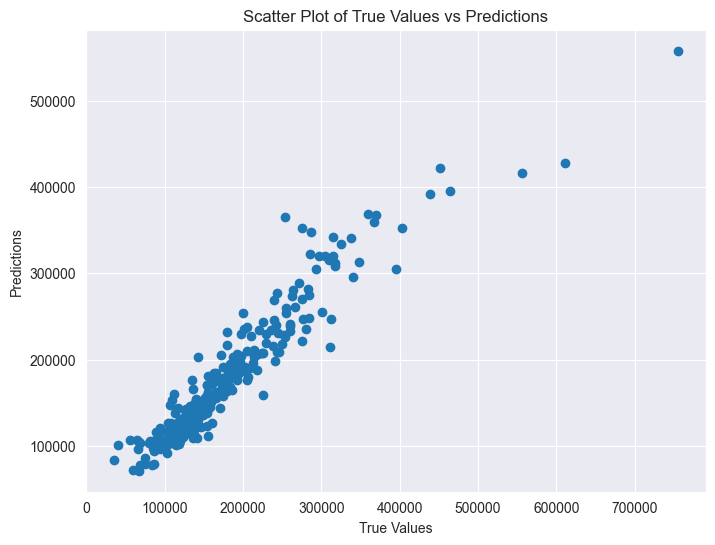

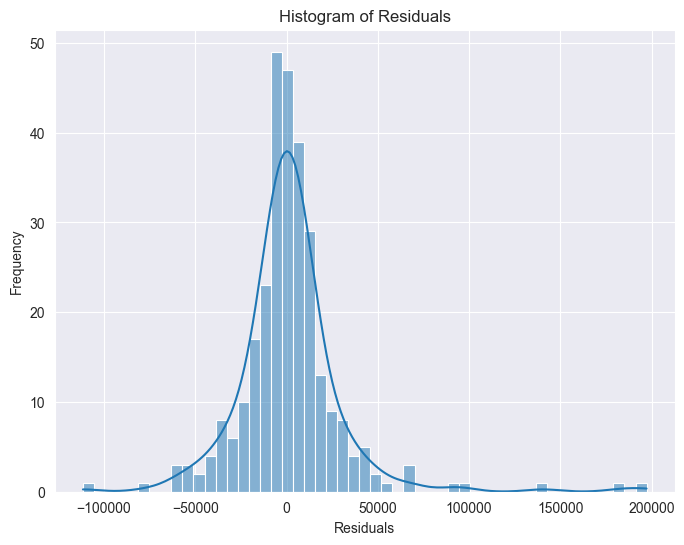

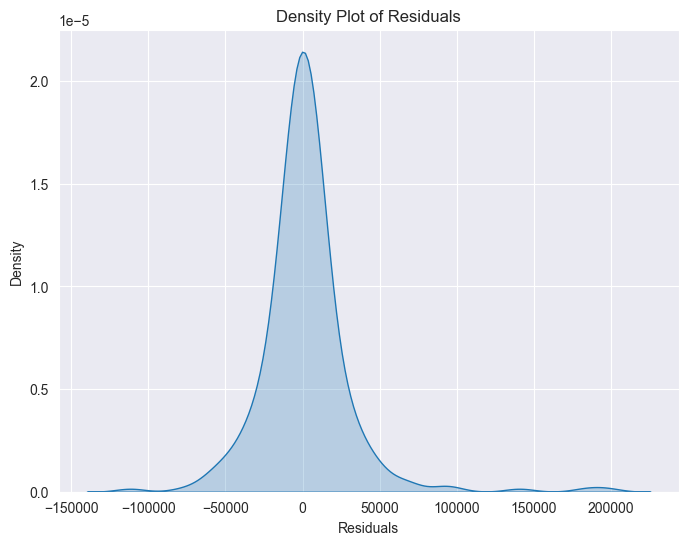

In [18]:
# Scatter plot des prédictions par rapport aux vraies valeurs
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter Plot of True Values vs Predictions')
plt.show()

# Histogramme des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Courbe de densité des résidus
plt.figure(figsize=(8, 6))
sns.kdeplot(residuals, fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()